In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt

In [2]:
import csv
import random
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
dataset=pd.read_csv('tweet - Sheet1.csv')

In [4]:
len(dataset)

4138

In [5]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
data=[]
for i in range(len(dataset)):
  tweet=re.sub('[^a-zA-Z]',' ',dataset['Tweet'][i])
  tweet=tweet.lower()
  tweet=tweet.split()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  tweet = [word for word in tweet if not word in set(all_stopwords)]
  tweet=' '.join(tweet)
  data.append(tweet)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
Dates=dataset['Dates']
df=pd.DataFrame({'Dates':Dates,'Tweets':data})

In [7]:
df

,Dates,Tweets
0,2022-09-29,mainstream media done amazing job brainwashing...
1,2022-09-29,tesla delivery estimates around k analysts tsla
2,2022-09-29,even include unvested rsus additional equity n...
3,2022-09-29,realdanodowd wholemarsblog tesla hahaha still ...
4,2022-09-29,realdanodowd tesla stop trying kill kids sad d...
...,...,...
4133,2022-08-10,full self driving beta mailing complex high tr...
4134,2022-08-10,intro today marketoutlook video marketscholars...
4135,2022-08-10,trade plan wednesday spx fails cpi tmrw premar...
4136,2022-08-10,elonmusk like tesla spacex marvin doge floki c...


In [8]:
ndata=pd.DataFrame(columns=['Date','Tweets'])

In [9]:
tweet = ""

for i in range(len(df) - 1):
    date = df.Dates.iloc[i]
    next_date = df.Dates.iloc[i + 1]
    if str(date) == str(next_date):
        tweet += df.Tweets.iloc[i] + " "
    else:
        tweet += df.Tweets.iloc[i]
        temp_df = pd.DataFrame([[date, tweet]], columns=['Date', 'Tweets'])
        ndata = pd.concat([ndata, temp_df], axis=0).reset_index(drop=True)
        tweet = ""

In [10]:
ndata

,Date,Tweets
0,2022-09-29,mainstream media done amazing job brainwashing...
1,NaN,aapl tsla seen big inflows retail amid broader...
2,2022-09-28,fyi illinois running ev rebate new used evs pu...
3,NaN,elon making burn jokes bullish tsla https co b...
4,2022-09-27,tesla needs fix negative camber issue model bu...
5,2022-09-26,tsla since legacy auto made sinking unit sales...
6,2022-09-25,reuters reports tesla plans construct battery ...
7,2022-09-24,saw highway today guess elonmusk really goat t...
8,2022-09-23,bears week spy qqq tsla https co hf elwgl wow ...
9,2022-09-22,tsla shares increased value basis points per d...


In [11]:
readd=pd.read_csv('closing price  - Sheet1 (1).csv')
print(readd)

          Date        Open        High         Low       Close   Adj Close  \
0   2022-08-11  296.513336  298.236664  285.833344  286.630005  286.630005   
1   2022-08-12  289.416656  300.160004  285.033325  300.029999  300.029999   
2   2022-08-15  301.786682  313.133331  301.230011  309.320007  309.320007   
3   2022-08-16  311.666656  314.666656  302.883331  306.563324  306.563324   
4   2022-08-17  303.396667  309.656677  300.033325  303.996674  303.996674   
5   2022-08-18  306.000000  306.500000  301.853333  302.869995  302.869995   
6   2022-08-19  299.000000  300.359985  292.500000  296.666656  296.666656   
7   2022-08-22  291.913330  292.399994  286.296661  289.913330  289.913330   
8   2022-08-23  291.453339  298.826660  287.923340  296.453339  296.453339   
9   2022-08-24  297.563324  303.646667  296.500000  297.096680  297.096680   
10  2022-08-25  302.359985  302.959992  291.600006  296.070007  296.070007   
11  2022-08-26  297.429993  302.000000  287.470001  288.089996  

In [12]:
ndata['Prices']=""

In [13]:
indx=0
for i in range (0,len(ndata)):
    for j in range (0,len(readd)):
        get_tweet_date=ndata.Date.iloc[i]
        get_stock_date=readd.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            ndata['Prices'].iloc[i] = int(readd.Close[j])

<ipython-input-13-d7ca34659dea>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ndata['Prices'].iloc[i] = int(readd.Close[j])
<ipython-input-13-d7ca34659dea>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You

In [14]:
ndata

,Date,Tweets,Prices
0,2022-09-29,mainstream media done amazing job brainwashing...,268
1,NaN,aapl tsla seen big inflows retail amid broader...,
2,2022-09-28,fyi illinois running ev rebate new used evs pu...,287
3,NaN,elon making burn jokes bullish tsla https co b...,
4,2022-09-27,tesla needs fix negative camber issue model bu...,282
5,2022-09-26,tsla since legacy auto made sinking unit sales...,276
6,2022-09-25,reuters reports tesla plans construct battery ...,
7,2022-09-24,saw highway today guess elonmusk really goat t...,
8,2022-09-23,bears week spy qqq tsla https co hf elwgl wow ...,275
9,2022-09-22,tsla shares increased value basis points per d...,288


In [15]:
mean=0
summ=0
count=0
for i in range(0,len(ndata)):
    if(ndata.Prices.iloc[i]!=""):
        summ=summ+int(ndata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ndata)):
    if(ndata.Prices.iloc[i]==""):
        ndata.Prices.iloc[i]=int(mean)

<ipython-input-15-91d64d74bccc>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ndata.Prices.iloc[i]=int(mean)
<ipython-input-15-91d64d74bccc>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting 

In [16]:
ndata

,Date,Tweets,Prices
0,2022-09-29,mainstream media done amazing job brainwashing...,268
1,NaN,aapl tsla seen big inflows retail amid broader...,291
2,2022-09-28,fyi illinois running ev rebate new used evs pu...,287
3,NaN,elon making burn jokes bullish tsla https co b...,291
4,2022-09-27,tesla needs fix negative camber issue model bu...,282
5,2022-09-26,tsla since legacy auto made sinking unit sales...,276
6,2022-09-25,reuters reports tesla plans construct battery ...,291
7,2022-09-24,saw highway today guess elonmusk really goat t...,291
8,2022-09-23,bears week spy qqq tsla https co hf elwgl wow ...,275
9,2022-09-22,tsla shares increased value basis points per d...,288


In [17]:
ndata["Compound"] = ''
ndata["Negative"] = ''
ndata["Neutral"] = ''
ndata["Positive"] = ''
ndata

,Date,Tweets,Prices,Compound,Negative,Neutral,Positive
0,2022-09-29,mainstream media done amazing job brainwashing...,268,,,,
1,NaN,aapl tsla seen big inflows retail amid broader...,291,,,,
2,2022-09-28,fyi illinois running ev rebate new used evs pu...,287,,,,
3,NaN,elon making burn jokes bullish tsla https co b...,291,,,,
4,2022-09-27,tesla needs fix negative camber issue model bu...,282,,,,
5,2022-09-26,tsla since legacy auto made sinking unit sales...,276,,,,
6,2022-09-25,reuters reports tesla plans construct battery ...,291,,,,
7,2022-09-24,saw highway today guess elonmusk really goat t...,291,,,,
8,2022-09-23,bears week spy qqq tsla https co hf elwgl wow ...,275,,,,
9,2022-09-22,tsla shares increased value basis points per d...,288,,,,


In [18]:
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ndata.iterrows():
  sentence_i = unicodedata.normalize('NFKD', ndata.loc[indexx, 'Tweets'])
  sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
  ndata['Compound'].iloc[indexx] = sentence_sentiment['compound']
  ndata['Negative'].iloc[indexx] = sentence_sentiment['neg']
  ndata['Neutral'].iloc[indexx] = sentence_sentiment['neu']
  ndata['Positive'].iloc[indexx] = sentence_sentiment['compound']

<ipython-input-18-3b03cadad7fc>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ndata['Compound'].iloc[indexx] = sentence_sentiment['compound']
<ipython-input-18-3b03cadad7fc>:6: FutureWarning: ChainedAssignmentError: behaviour will change 

In [19]:
ndata


,Date,Tweets,Prices,Compound,Negative,Neutral,Positive
0,2022-09-29,mainstream media done amazing job brainwashing...,268,0.9943,0.117,0.74,0.9943
1,NaN,aapl tsla seen big inflows retail amid broader...,291,0.0,0.0,1.0,0.0
2,2022-09-28,fyi illinois running ev rebate new used evs pu...,287,0.998,0.091,0.755,0.998
3,NaN,elon making burn jokes bullish tsla https co b...,291,0.25,0.0,0.818,0.25
4,2022-09-27,tesla needs fix negative camber issue model bu...,282,0.9985,0.071,0.793,0.9985
5,2022-09-26,tsla since legacy auto made sinking unit sales...,276,0.9989,0.088,0.75,0.9989
6,2022-09-25,reuters reports tesla plans construct battery ...,291,0.9941,0.093,0.752,0.9941
7,2022-09-24,saw highway today guess elonmusk really goat t...,291,0.9986,0.066,0.745,0.9986
8,2022-09-23,bears week spy qqq tsla https co hf elwgl wow ...,275,0.9991,0.083,0.753,0.9991
9,2022-09-22,tsla shares increased value basis points per d...,288,0.9988,0.096,0.743,0.9988


positive percentage= 96.29629629629629
negative percentage= 1.8518518518518516


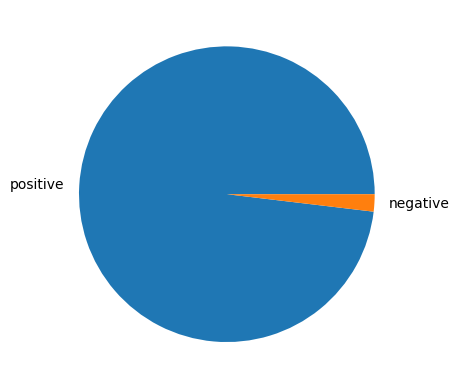

In [20]:
pos=0
neg=0
for i in range(len(ndata)):
  x=ndata.Compound[i]
  if(x>0):
    pos=pos+1
  elif(x<0):
    neg=neg+1
posper=(pos/len(ndata))*100
negper=(neg/len(ndata))*100
print("positive percentage=",posper)
print("negative percentage=",negper)
plt.pie([posper,negper],labels=['positive','negative'])
plt.show()

In [21]:
newdf=ndata[['Date','Prices','Compound','Negative','Neutral','Positive']].copy()
newdf

,Date,Prices,Compound,Negative,Neutral,Positive
0,2022-09-29,268,0.9943,0.117,0.74,0.9943
1,NaN,291,0.0,0.0,1.0,0.0
2,2022-09-28,287,0.998,0.091,0.755,0.998
3,NaN,291,0.25,0.0,0.818,0.25
4,2022-09-27,282,0.9985,0.071,0.793,0.9985
5,2022-09-26,276,0.9989,0.088,0.75,0.9989
6,2022-09-25,291,0.9941,0.093,0.752,0.9941
7,2022-09-24,291,0.9986,0.066,0.745,0.9986
8,2022-09-23,275,0.9991,0.083,0.753,0.9991
9,2022-09-22,288,0.9988,0.096,0.743,0.9988


In [22]:
train_starting_index = '0'
train_last_index = '46'
test_starting_index = '47'
test_last_index = '53'
train=newdf.loc[train_starting_index:train_last_index]
test=newdf.loc[test_starting_index:test_last_index]

In [23]:
sentiment_list = []
for date in train.index:
    sentiment_score = [newdf.loc[date, 'Negative'], newdf.loc[date, 'Positive']]
    sentiment_list.append(sentiment_score)
df_train = np.array(sentiment_list)
print(df_train)

[[ 0.117   0.9943]
 [ 0.      0.    ]
 [ 0.091   0.998 ]
 [ 0.      0.25  ]
 [ 0.071   0.9985]
 [ 0.088   0.9989]
 [ 0.093   0.9941]
 [ 0.066   0.9986]
 [ 0.083   0.9991]
 [ 0.096   0.9988]
 [ 0.069   0.9936]
 [ 0.101   0.9912]
 [ 0.074   0.999 ]
 [ 0.063   0.9968]
 [ 0.068   0.9982]
 [ 0.045   0.9997]
 [ 0.083   0.9994]
 [ 0.072   0.9993]
 [ 0.052   0.999 ]
 [ 0.062   0.9983]
 [ 0.058   0.9992]
 [ 0.095   0.9914]
 [ 0.056   0.9994]
 [ 0.072   0.9991]
 [ 0.082   0.9992]
 [ 0.183  -0.4019]
 [ 0.083   0.9981]
 [ 0.071   0.992 ]
 [ 0.059   0.9978]
 [ 0.039   0.9994]
 [ 0.062   0.9996]
 [ 0.077   0.9985]
 [ 0.069   0.9992]
 [ 0.069   0.9992]
 [ 0.066   0.9994]
 [ 0.077   0.9992]
 [ 0.067   0.999 ]
 [ 0.073   0.9992]
 [ 0.08    0.9996]
 [ 0.078   0.9993]
 [ 0.088   0.9989]
 [ 0.06    0.9996]
 [ 0.04    0.9995]
 [ 0.087   0.9925]
 [ 0.036   0.9996]
 [ 0.067   0.9994]
 [ 0.096   0.9973]]


In [24]:
sentiment_list_1 = []
for date in test.index:
    sentiment_score_1 = [newdf.loc[date, 'Negative'], newdf.loc[date, 'Positive']]
    sentiment_list_1.append(sentiment_score_1)
df_test = np.array(sentiment_list_1)
print(df_test)

[[0.054  0.999 ]
 [0.083  0.9994]
 [0.076  0.9991]
 [0.058  0.9978]
 [0.074  0.999 ]
 [0.106  0.9992]
 [0.078  0.9999]]


In [25]:
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])

In [26]:
y_train

,Prices
0,268
1,291
2,287
3,291
4,282
5,276
6,291
7,291
8,275
9,288


In [27]:
y_test

,Prices
47,306
48,309
49,291
50,291
51,300
52,286
53,291


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
rf = RandomForestRegressor()
rf.fit(df_train, y_train)
prediction = rf.predict(df_test)
print(prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[293.16       299.49       288.13       292.36       298.69
 290.68333333 294.09      ]


In [30]:
idx= np.arange(int(test_starting_index),int(test_last_index)+1)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [31]:
predictions_df_

,Prices
47,293.160000
48,299.490000
49,288.130000
50,292.360000
51,298.690000
52,290.683333
53,294.090000


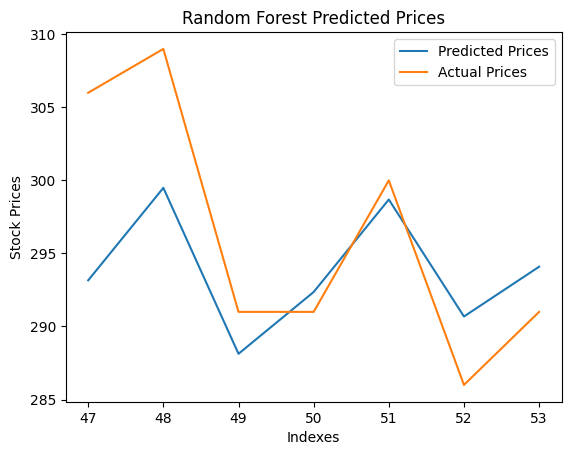

In [43]:
plt.plot(predictions_df_['Prices'])
plt.plot(y_test['Prices'])
plt.xlabel("Indexes")
plt.ylabel("Stock Prices")
plt.title("Random Forest Predicted Prices")
plt.legend(['Predicted Prices','Actual Prices'])